# Exploring Text Data (2)

## PyConUK talk abstract

Data set of abstracts for the PyConUK 2016 talks (retrieved 14th Sept 2016 from https://github.com/PyconUK/2016.pyconuk.org)

The data can be found in `../data/pyconuk2016/{keynotes,workshops,talks}/*`

There are 101 abstracts

## Load the data

Firstly, we load all the data into the `documents` dictionary

We also merge the documents into one big string, `corpus_all_in_one`, for convenience

In [1]:
import os

data_dir = os.path.join('..','data','pyconuk2016')
talk_types = ['keynotes','talks','workshops']

all_talk_files = [os.path.join(data_dir,talk_type,fname)
                 for talk_type in talk_types
                 for fname in os.listdir(os.path.join(data_dir,talk_type))]


In [2]:
documents = {}
for talk_fname in all_talk_files:
    bname = os.path.basename(talk_fname)
    talk_title = os.path.splitext(bname)[0]
    with open(talk_fname,'r') as f:
        content = f.read()
        documents[talk_title] = content



In [3]:
corpus_all_in_one = ' '.join([doc for doc in documents.values()])

print("Number of talkes: {}".format(len(all_talk_files)))
print("Corpus size (char): {}".format((len(corpus_all_in_one))))

Number of talkes: 101
Corpus size (char): 78067


In [4]:
# Visualisation
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [6]:
cloud = WordCloud(max_words = 100)
#WordCloud?

In [8]:
#cloud.generate_from_text?
cloud.generate_from_text(corpus_all_in_one)

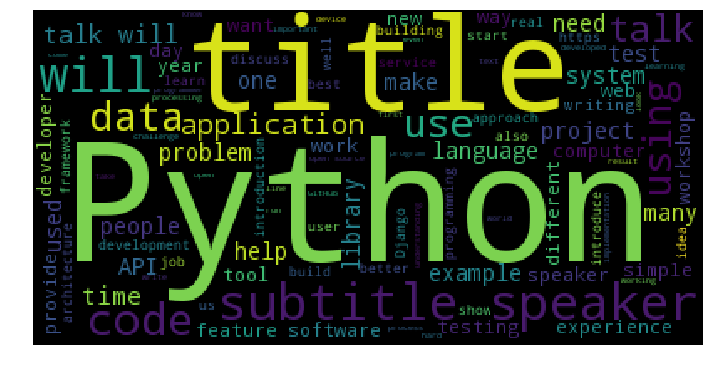

In [9]:
plt.figure(figsize = (12,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [10]:
all_talk_files[0]

'../data/pyconuk2016/keynotes/folklore-and-fantasy-in-the-information-age.md'

In [11]:
%cat {all_talk_files[0]}

# For a list of magics type:
# %lsmagic

title: 'Folklore and fantasy in the information age'
subtitle:
speaker: gail-ollis
---


In [12]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl  %%prun  %%pypy  %%python  %%python2  %%python3

In [14]:
documents = {}
for talk_fname in all_talk_files:
    bname = os.path.basename(talk_fname)
    talk_title = os.path.splitext(bname)[0]
    with open(talk_fname,'r') as f:
        content = ""
        for line in f:
            if line.startswith('title:'):
                line = line[6:]
            if line.startswith('subtitle:') \
            or line.startswith('spkeaker:') \
            or line.startswith('---'):
                continue
            content += line
        documents[talk_title] = content

corpus_all_in_one = ' '.join([doc for doc in documents.values()])

In [15]:
print("Number of talkes: {}".format(len(all_talk_files)))
print("Corpus size (char): {}".format((len(corpus_all_in_one))))

Number of talkes: 101
Corpus size (char): 76217


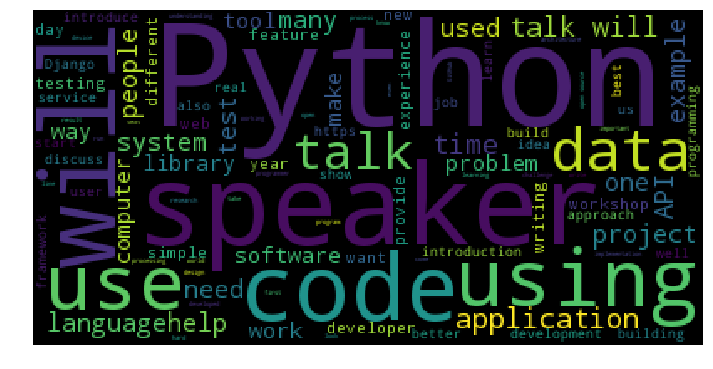

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

cloud = WordCloud(max_words=100)
cloud.generate_from_text(corpus_all_in_one)

plt.figure(figsize=(12,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [19]:
from collections import Counter
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [20]:
stop_list = stopwords.words('english') + list(string.punctuation)

In [21]:
document_frequency = Counter()
for talk_id, content in documents.items():
    try:
        tokens = word_tokenize(content)
    except UnicodeDecodeError:
        tokens = word_tokenize(content.decode('utf-8'))
    unique_tokens = [token.lower() for token in set(tokens)
                    if token.lower() not in stop_list]
    document_frequency.update(unique_tokens)

In [22]:
for word, freq in document_frequency.most_common(20):
    print("{}\t{}".format(word, freq))

speaker	101
python	63
talk	59
code	37
using	36
use	33
's	31
data	28
used	21
'll	21
also	19
help	19
many	19
one	19
language	18
time	18
development	18
learning	18
''	17
library	16


In [23]:
# print(stop_list)
for item in ['will', "'ll", 'll']:
    print("{} in stop_list == {}".format(item, item in stop_list))

will in stop_list == True
'll in stop_list == False
ll in stop_list == True


In [ ]:
from nltk import ngrams

try:
    all_tokens = [t for t in word_tokenize(corpus_all_in_one)]
except UnicodeDecodeError:
    all_tokens = [t for t in word_tokenize(corpus_all_in_one.decode('utf-8'))]

bigrams = ngrams(all_tokens, 2)
trigrams = ngrams(all_tokens, 3)

bi_count = Counter(bigrams)
tri_count = Counter(trigrams)

for phrase, freq in bi_count.most_common(20):
    print("{}\t{}".format(phrase, freq))
    
for phrase, freq in tri_count.most_common(20):
    print("{}\t{}".format(phrase, freq))

## Term Frequency (TF)

TF provides a weight of a term within a document, based on the term frequency

TF(term, doc) = count(term in doc)

TF(term, doc) = count(term in doc) / len(doc)


## Inverse Document Frequency (IDF)

IDF provides a weight of a term across the collection, based on the document frequency of such term

IDF(term) = log( N / DF(term) )

IDF(term) = log( 1 + N / DF(term) )

## Introducing sklearn

So far, we have used some homemade implementation to count words

What if we need something more involved?

sklearn (http://scikit-learn.org/) is one of the main libraries for Machine Learning in Python

With an easy-to-use interface, it provides support for a variety of Machine Learning models

We're going to use it to tackle a Text Classification problem
